# **Task 7: Stock Market Prediction using Numerical and Textual Analysis**
# **Author: Hith Jain**

**First we predict the stock price using Historical Data, I have selected Apple Company as an example**

In [14]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL (1).csv


In [15]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['AAPL.csv']))
# Dataset is now stored in a Pandas Dataframe



frame1 = [x for x in df.Open]
frame2 = [x for x in df.Close]
frame3 = [x for x in df.Date]
frame4 = [x for x in df.High]
frame5 = [x for x in df.Low]
df = pd.DataFrame({
    "Open":frame1,
    "Close":frame2,
    "Date":frame3,
    "High":frame4,
    "Low":frame5
})

print(len(df))

253


In [16]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
!pip install tensorflow==1.14
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10

In [17]:
# import all stock prices 

print (df.describe)

## number of different stocks
# print('\nnumber of different stocks: ', len(list(set(df.symbol))))
# print(list(set(df.symbol))[:10])

# df.tail()
# df.describe()

<bound method NDFrame.describe of            Open       Close      Date        High         Low
0     65.922501   65.502502  21-11-19   66.002502   65.294998
1     65.647499   65.445000  22-11-19   65.794998   65.209999
2     65.677498   66.592499  25-11-19   66.610001   65.629997
3     66.735001   66.072502  26-11-19   66.790001   65.625000
4     66.394997   66.959999  27-11-19   66.995003   66.327499
..          ...         ...       ...         ...         ...
248  118.919998  120.300003  16-11-20  120.989998  118.150002
249  119.550003  119.389999  17-11-20  120.669998  118.959999
250  118.610001  118.029999  18-11-20  119.820000  118.000000
251  117.589996  118.639999  19-11-20  119.059998  116.809998
252  118.639999  117.339996  20-11-20  118.769997  117.290001

[253 rows x 5 columns]>


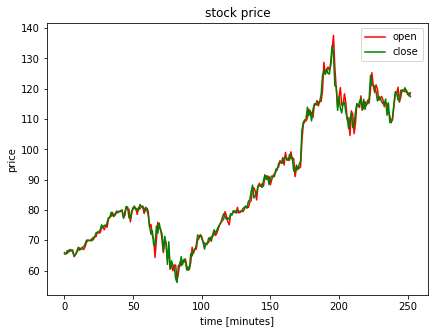

In [18]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df.Open.values, color='red', label='open')
plt.plot(df.Close.values, color='green', label='close')
# plt.plot(df.Low.values, color='blue', label='low')
# plt.plot(df.High.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [minutes]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

In [19]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df['Low'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]))
    train_set_size = data.shape[0] - (valid_set_size + test_set_size)
    print (valid_set_size,test_set_size)
    print (data.shape[0])
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]
# choose one stock
df_stock = df.copy()
df_stock.drop(['Date'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))
print(len(x_valid),len(y_valid))

df_stock.columns.values =  ['Open', 'Close', 'High', 'Low']
23 23
233
x_train.shape =  (187, 19, 4)
y_train.shape =  (187, 4)
x_valid.shape =  (23, 19, 4)
y_valid.shape =  (23, 4)
x_test.shape =  (23, 19, 4)
y_test.shape =  (23, 4)
187 187
23 23
23 23


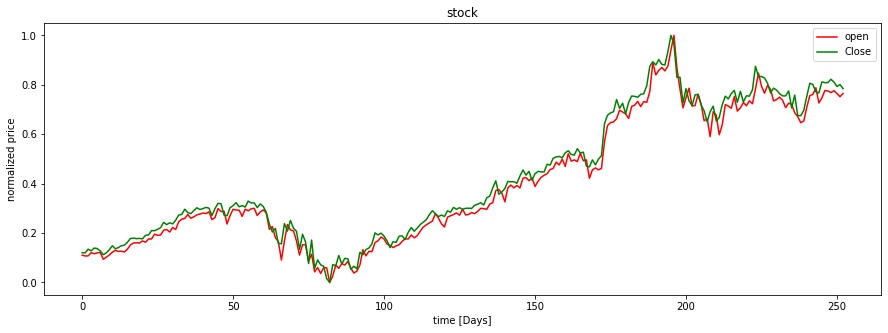

In [20]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.Open.values, color='red', label='open')
plt.plot(df_stock_norm.Close.values, color='green', label='Close')
# plt.plot(df_stock_norm.Low.values, color='blue', label='low')
# plt.plot(df_stock_norm.High.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [Days]')
plt.ylabel('normalized price')
plt.legend(loc='best')
plt.show()

In [21]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 10
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# # use Basic RNN Cell
# layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
#           for layer in range(n_layers)]
# use Basic LSTM Cell 
#layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

#use LSTM Cell with peephole connections
layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
                                 activation=tf.nn.leaky_relu, use_peepholes = True)
         for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    print (int(n_epochs*train_set_size/batch_size))
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

1870
0.00 epochs: MSE train/valid = 0.161669/0.482878
4.97 epochs: MSE train/valid = 0.004982/0.014845
9.95 epochs: MSE train/valid = 0.002038/0.001980
14.92 epochs: MSE train/valid = 0.001701/0.001874
19.89 epochs: MSE train/valid = 0.002755/0.006574
24.87 epochs: MSE train/valid = 0.001186/0.002065
29.84 epochs: MSE train/valid = 0.001121/0.001884
34.81 epochs: MSE train/valid = 0.001021/0.001494
39.79 epochs: MSE train/valid = 0.000932/0.002870
44.76 epochs: MSE train/valid = 0.000914/0.002389
49.73 epochs: MSE train/valid = 0.000740/0.001417
54.71 epochs: MSE train/valid = 0.000905/0.001526
59.68 epochs: MSE train/valid = 0.000869/0.002295
64.65 epochs: MSE train/valid = 0.000688/0.001462
69.63 epochs: MSE train/valid = 0.000746/0.002043
74.60 epochs: MSE train/valid = 0.000809/0.001969
79.57 epochs: MSE train/valid = 0.000874/0.001526
84.55 epochs: MSE train/valid = 0.000659/0.001947
89.52 epochs: MSE train/valid = 0.000966/0.003140
94.49 epochs: MSE train/valid = 0.001332/0.00510

In [22]:
y_train.shape

(187, 4)

correct sign prediction for close - open price for train/valid/test: 0.89/0.83/0.91


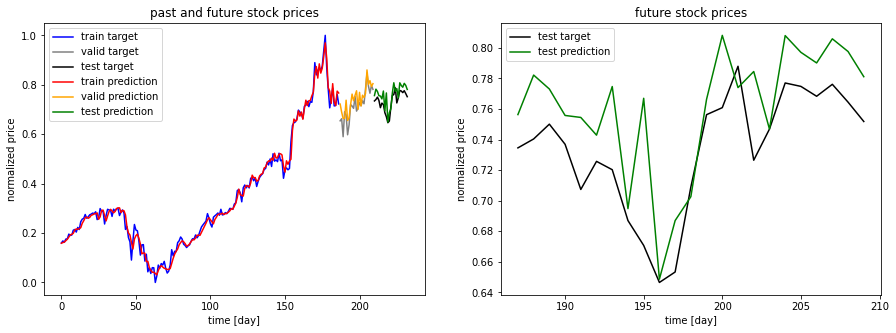

In [23]:
ft = 0 
# 0 = open, 1 = close, 2 = highest, 3 = lowest
## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [day]') 
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')
plt.title('future stock prices')
plt.xlabel('time [day]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

**The green line tells us the prediction of the input data while dark line is the target value**

## **Sentimental Analysis of News headlines**


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [25]:
# pip install TextBlob

**Reading dataset directly from google and
Printing the first 5 rows of the dataset**

In [26]:
dataset = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/DPQMQH/P2Z4PM')
dataset.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


**Printing the last 5 rows of the dataset**

In [27]:
dataset.tail()

,publish_date,headline_category,headline_text
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


### **1. Exploratory Data Analysis - Checking the types of data and basic summary stats.**

There are three features - **Publish Data, HeadLine Category and HeadLine Text**.The main aim is to do **sentimental analysis** of the news HeadLines.

**1.1 Displaying datatype of each column and also display the non-null row**

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


**Observation**: We can find that only the **publish_date is of integer type** where as **headline_category and headline_text are of object**

**1.2 Finding the categorical variables**

In [29]:
dataset['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
sports.headline3                7
ballot-talk                     7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

**1.3 Dividing the news based on cities**

In [30]:
city_vise = dataset[dataset['headline_category'].str.contains('^city\.[a-z]+$', regex=True
                                                               )]
city_vise

,publish_date,headline_category,headline_text
274,20010104,city.bengaluru,Three in race for chief secy's post
275,20010104,city.patna,Druggists' stir leads to shortage of medicines
278,20010104,city.bengaluru,He's not so inscrutable
279,20010104,city.delhi,DPCC stages Nyay rally
643,20010110,city.patna,Fend for yourselves; Pande tells doctors
...,...,...,...
3297139,20200630,city.delhi,Remove illegal signage or face penalty: NDMC
3297158,20200630,city.bengaluru,what bengaluru can do to tackle covid surge
3297161,20200630,city.bengaluru,karnataka may adopt keralas triple lockdown plan
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...


**Observation**: Now we have split the dataset based on cities for easy analysis

**1.4 Seperating city name from dataset**

In [31]:
city = pd.DataFrame(columns=['city_name'])

In [32]:
city['city_name'] = city_vise.headline_category.str.split('.',expand=True)[1]

In [33]:
city_vise = pd.concat([city_vise,city],axis = 1)

In [34]:
city_vise.drop(columns=['headline_category'],axis=1,inplace=True)

In [35]:
city_vise.reset_index(inplace = True)

In [36]:
city_vise.head()

,index,publish_date,headline_text,city_name
0,274,20010104,Three in race for chief secy's post,bengaluru
1,275,20010104,Druggists' stir leads to shortage of medicines,patna
2,278,20010104,He's not so inscrutable,bengaluru
3,279,20010104,DPCC stages Nyay rally,delhi
4,643,20010110,Fend for yourselves; Pande tells doctors,patna


In [37]:
city_vise.city_name.unique()

array(['bengaluru', 'patna', 'delhi', 'ahmedabad', 'thiruvananthapuram',
       'pune', 'mumbai', 'chandigarh', 'lucknow', 'kolkata', 'hyderabad',
       'chennai', 'bareilly', 'aurangabad', 'nagpur', 'bhopal',
       'vadodara', 'jaipur', 'goa', 'thane', 'hubballi', 'mangaluru',
       'mysuru', 'rajkot', 'surat', 'kanpur', 'varanasi', 'allahabad',
       'ludhiana', 'guwahati', 'bhubaneswar', 'ranchi', 'gurgaon',
       'coimbatore', 'noida', 'madurai', 'indore', 'kochi', 'kozhikode',
       'nashik', 'raipur', 'visakhapatnam', 'kolhapur', 'navimumbai',
       'trichy', 'puducherry', 'dehradun', 'meerut', 'agra', 'vijayawada',
       'jamshedpur', 'imphal', 'shillong', 'amritsar', 'shimla',
       'cuttack', 'jind', 'agartala', 'jammu', 'faridabad', 'srinagar',
       'salem', 'rajahmundry', 'erode', 'ghaziabad', 'itanagar', 'ajmer',
       'kohima', 'gaya', 'jodhpur', 'udaipur', 'amaravati'], dtype=object)

**1.5 Finding the city with most headlines**

In [38]:
city_head = city_vise.groupby(['city_name']).agg({'headline_text':'count'})

In [39]:
city_headline_count = city_head.sort_values(by='headline_text',ascending=False)
most_headline_city = city_headline_count.head(10)
most_headline_city

,headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
ahmedabad,85813
pune,84620
lucknow,83591
kolkata,81298


**1.6 Visualizing the headline count**

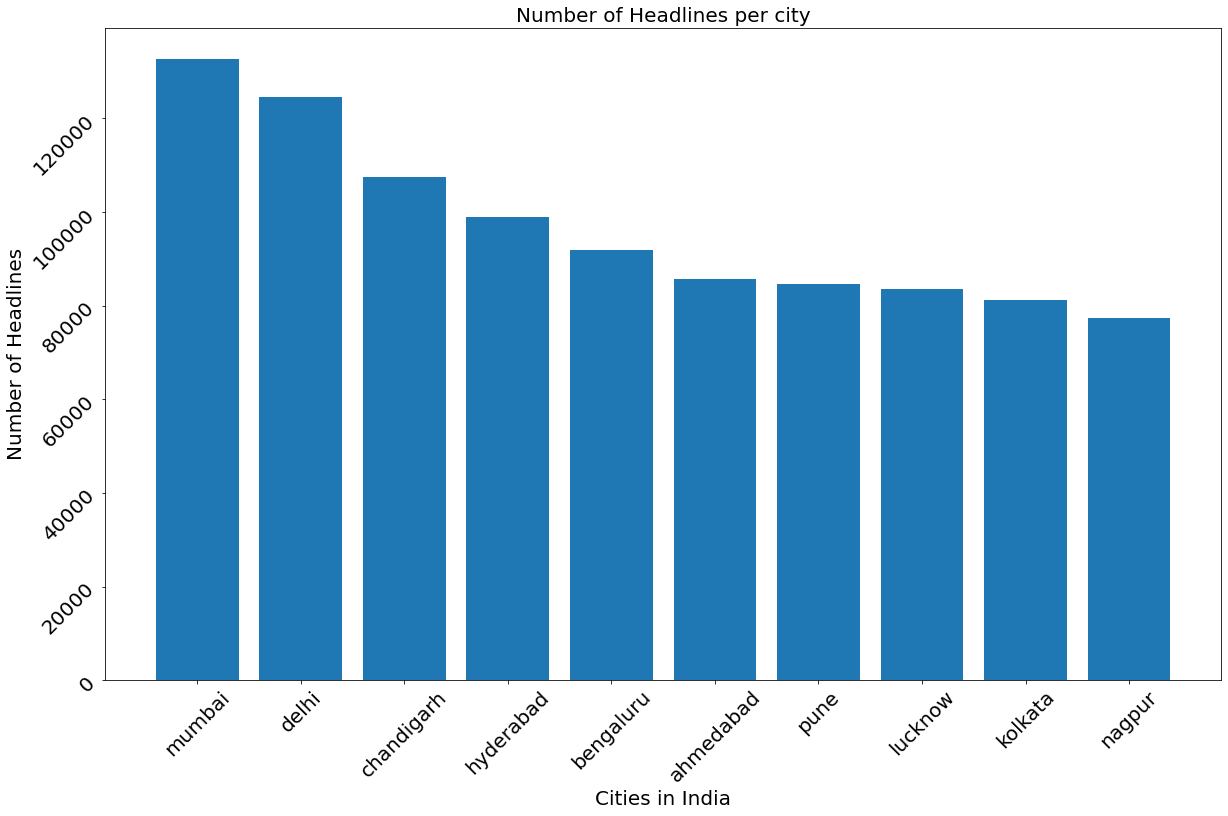

In [40]:
plt.figure(figsize=(20,12))
plt.bar(most_headline_city.index,height=most_headline_city['headline_text'])
plt.xticks(rotation = 45,fontsize=20)
plt.yticks(rotation = 45,fontsize=20)
plt.xlabel('Cities in India',fontsize=20)
plt.ylabel('Number of Headlines',fontsize=20)
plt.title('Number of Headlines per city',fontsize=20)
plt.show()

**Observation**: We can find that **Mumbai** has highest headlines over the remaining countries followed by **Delhi** and **Chandigarh**

### **2. Checking Year and Most coverage cities**

**2.1 Converting the publish_data datatype as date time**

In [41]:
city_vise['publish_date'] = pd.to_datetime(city_vise['publish_date'])
city_vise.head()

,index,publish_date,headline_text,city_name
0,274,1970-01-01 00:00:00.020010104,Three in race for chief secy's post,bengaluru
1,275,1970-01-01 00:00:00.020010104,Druggists' stir leads to shortage of medicines,patna
2,278,1970-01-01 00:00:00.020010104,He's not so inscrutable,bengaluru
3,279,1970-01-01 00:00:00.020010104,DPCC stages Nyay rally,delhi
4,643,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna


**2.2 Extracting the Year**

In [42]:
city_vise['Year'] = city_vise['publish_date'].apply(lambda x: (x.microsecond)//10)

In [43]:
city_vise.drop(columns=['publish_date','index'],axis=1,inplace=True)

In [44]:
city_vise.head()

,headline_text,city_name,Year
0,Three in race for chief secy's post,bengaluru,2001
1,Druggists' stir leads to shortage of medicines,patna,2001
2,He's not so inscrutable,bengaluru,2001
3,DPCC stages Nyay rally,delhi,2001
4,Fend for yourselves; Pande tells doctors,patna,2001


**2.3 Creating a new column to count headlines**

In [45]:
city_vise_dup = city_vise.copy()
city_vise_dup['Headlines Count'] = 1
city_vise_dup.head()

,headline_text,city_name,Year,Headlines Count
0,Three in race for chief secy's post,bengaluru,2001,1
1,Druggists' stir leads to shortage of medicines,patna,2001,1
2,He's not so inscrutable,bengaluru,2001,1
3,DPCC stages Nyay rally,delhi,2001,1
4,Fend for yourselves; Pande tells doctors,patna,2001,1


In [46]:
most_headline_city.head()

,headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857


In [47]:
city_vise_year_count = pd.Series(city_vise_dup.groupby(['Year'])['headline_text'].count())


In [48]:
city_vise_year_count.head()

Year
2001    31365
2002    53721
2003    48409
2004    34030
2005    15788
Name: headline_text, dtype: int64

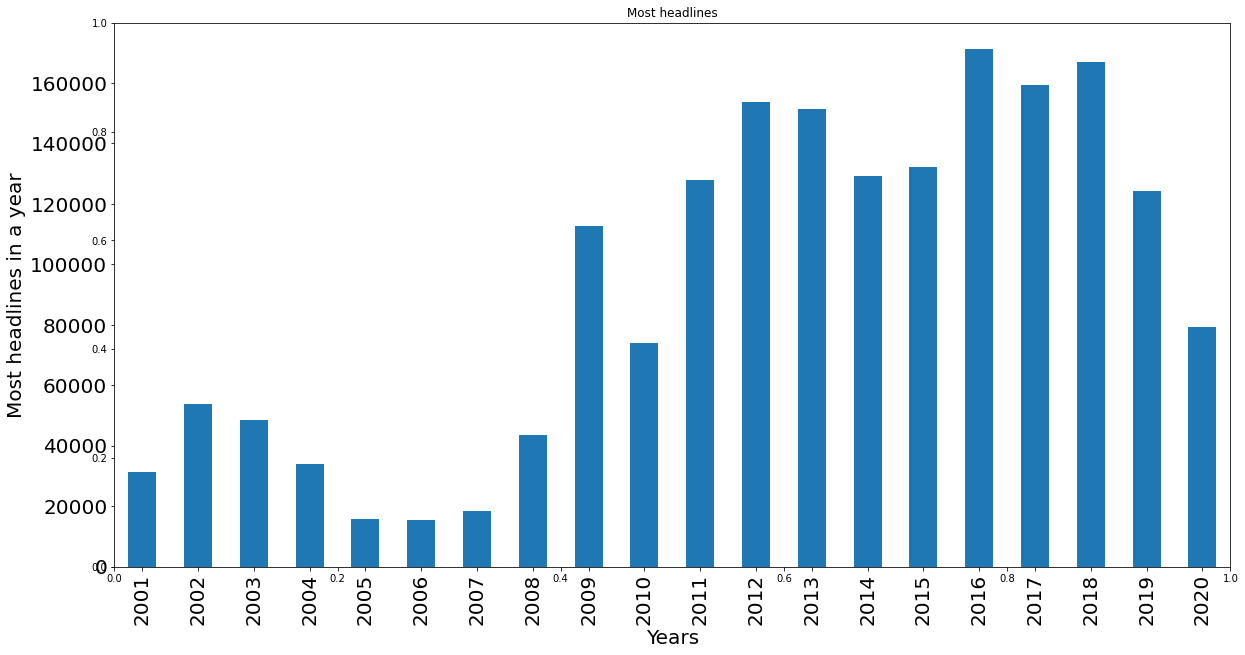

<Figure size 1440x720 with 0 Axes>

In [49]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

plt.figure(figsize=(20,10))
city_vise_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Most headlines" ,fontsize = 20)
a.set_ylabel('Most headlines in a year',fontsize=20)
a.set_xlabel("Years",fontsize = 20)



plt.show()

**Observation**: We can find that **2016** has the most news headlines.

### **3. Topic Most Covered**

In [50]:
dataset.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [51]:
new_dataset = dataset.copy()

In [52]:
new_dataset['category'] = new_dataset['headline_category'].str.split('.').map(lambda x: x[0])

In [53]:
new_dataset.head()

,publish_date,headline_category,headline_text,category
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,sports
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,unknown
2,20010102,unknown,Fissures in Hurriyat over Pak visit,unknown
3,20010102,unknown,America's unwanted heading for India?,unknown
4,20010102,unknown,For bigwigs; it is destination Goa,unknown


**3.1 Finding the top most category**

In [54]:
new_dataset_top_categoris = new_dataset.groupby(['category']).agg({'headline_text':'count'}).sort_values(by = 'headline_text',ascending =False)

In [55]:
new_dataset_top_categoris_top = new_dataset_top_categoris.drop(['unknown','tv','top-stories','city','citizen','edit-page','top-headlines','world']).head(10)
new_dataset_top_categoris_top

,headline_text
category,
india,285619
entertainment,224877
business,153876
sports,129494
home,77208
life-style,43370
tech,37220
news,13987
elections,9003


In [56]:
new_dataset_top_categoris_top.reset_index(inplace = True)
new_dataset_top_categoris_top

,category,headline_text
0,india,285619
1,entertainment,224877
2,business,153876
3,sports,129494
4,home,77208
5,life-style,43370
6,tech,37220
7,news,13987
8,elections,9003
9,delhi-times,7356


**Observation**: We can find that **India, Entertainment and business** are the most categories.

**3.2 Visualizing**

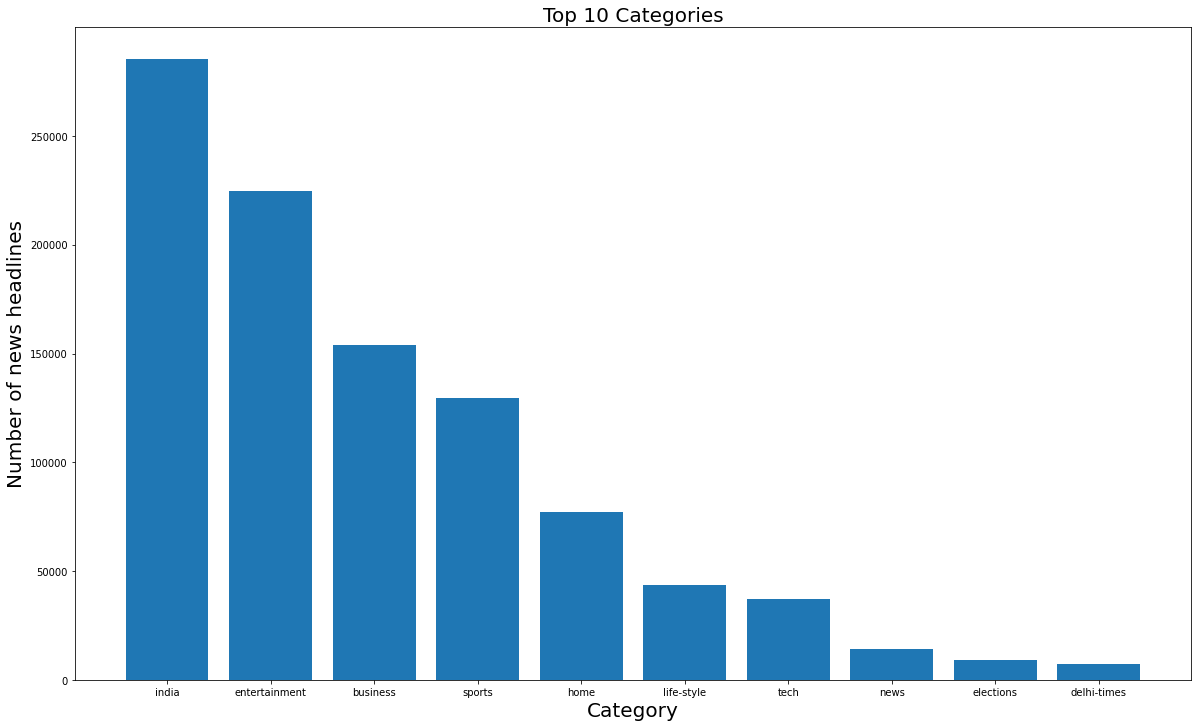

In [57]:
plt.figure(figsize=(20,12))
plt.bar(new_dataset_top_categoris_top.category, height=new_dataset_top_categoris_top.headline_text)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Number of news headlines',fontsize = 20)
plt.title('Top 10 Categories',fontsize = 20)
plt.show()

### **4. Sentimental Analysis**

**4.1 Sentimental Analysis using TextBlob**

**4.2 Categoring the Variables**

In [ ]:
summary = dataset.groupby(['Result']).agg({'headline_text' : 'count'})

**4.3 Visualizing the summary**

In [ ]:
plt.figure(figsize = (8,8))
summary['headline_text'].plot.pie(autopct = '%1.1f%%')
plt.show()

In [ ]:
negative = (summary.loc['negative'] / len(dataset))*100
neutral = (summary.loc['neutral'] / len(dataset))*100
positive = (summary.loc['positive'] / len(dataset))*100

In [ ]:
print(' Positive Headlines: ' , positive )
print('\n\n Negative Headlines: ' ,negative )
print('\n\n Neutral Headlines: ' , str(neutral))

**Conclusion**: We can observe that there are most of **neutral headlines** overall